# **Elon Musk Tweets Scrapping. Sentiment and Text Analysis on that data.**

In [ ]:
# !pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 2.6 MB/s 


## Import Libraries

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import re # Regular Expression -> for cleaning data
import matplotlib.pyplot as plt
import seaborn as sns # Visualization
from textblob import TextBlob # for Sentiment Analysis

%matplotlib inline

In [ ]:
# Commented this to not generate the dataframe again and again

# Creating list to append tweet data to
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:elonmusk').get_items()):
    if i>5000:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.retweetCount])
    
# Creating a dataframe from the tweets list above 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Num_of_Likes', 'Num_of_Retweets'])
tweets_df1.to_csv('tweets.csv', mode = 'a', index=False)


In [ ]:
df = pd.read_csv('tweets.csv', encoding = 'unicode_escape')
df.head()

,Datetime,Tweet Id,Text,Username,Num_of_Likes,Num_of_Retweets
0,2022-12-08 20:10:27+00:00,1600945923898556417,@WholeMarsBlog Macro conditions are difficult:...,elonmusk,6903,496
1,2022-12-08 20:05:38+00:00,1600944712990396416,@SawyerMerritt This capability will save many ...,elonmusk,1706,145
2,2022-12-08 20:03:42+00:00,1600944225964593152,"@RepAdamSchiff @RepMarkTakano False, hate spee...",elonmusk,55061,5510
3,2022-12-08 19:54:54+00:00,1600942011325902849,@SawyerMerritt But the really mind-blowing thi...,elonmusk,2701,309
4,2022-12-08 19:53:03+00:00,1600941548375805953,@SawyerMerritt Important to note that this is ...,elonmusk,3168,262


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Datetime         5001 non-null   object
 1   Tweet Id         5001 non-null   int64 
 2   Text             5001 non-null   object
 3   Username         5001 non-null   object
 4   Num_of_Likes     5001 non-null   int64 
 5   Num_of_Retweets  5001 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 234.5+ KB


# **Data cleaning**
###Text cleaning

In [ ]:
# Creating a function to clean the tweets

def cleantwt (twt):
  emoj = re.compile("["
        # u'' literal is used in python to create a unicode string and re.UNICODE flag is passed
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
                      "]+", re.UNICODE)
  # re.sub to substitute values
  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

In [ ]:
# Create a new column with the cleaned tweets

df['Cleaned_Tweets'] = df['Text'].apply(cleantwt)

In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username,Num_of_Likes,Num_of_Retweets,Cleaned_Tweets
0,2022-12-08 20:10:27+00:00,1600945923898556417,@WholeMarsBlog Macro conditions are difficult:...,elonmusk,6903,496,Macro conditions are difficult: energy in Euro...
1,2022-12-08 20:05:38+00:00,1600944712990396416,@SawyerMerritt This capability will save many ...,elonmusk,1706,145,This capability will save many lives
2,2022-12-08 20:03:42+00:00,1600944225964593152,"@RepAdamSchiff @RepMarkTakano False, hate spee...",elonmusk,55061,5510,"False, hate speech impressions are actually do..."
3,2022-12-08 19:54:54+00:00,1600942011325902849,@SawyerMerritt But the really mind-blowing thi...,elonmusk,2701,309,But the really mind-blowing thing is that this...
4,2022-12-08 19:53:03+00:00,1600941548375805953,@SawyerMerritt Important to note that this is ...,elonmusk,3168,262,Important to note that this is *total* bandwid...


In [ ]:
# Drop rows with empty strings ('')

df.drop(df[df['Cleaned_Tweets'] == ''].index, inplace = True)

In [ ]:
# Counting duplicate data in dataframe

df.duplicated().sum()

0

In [ ]:
shape = df.shape

print(f"There are {shape[0]} tweets after the cleanup.")

There are 4821 tweets after the cleanup.


# **Sentiment Analysis**

In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [ ]:
#Create two new columns to save the results of the created functions 
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [ ]:
# Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [ ]:
# Create a new column 'Sentiment'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#Show the data
df.head()

,Datetime,Tweet Id,Text,Username,Num_of_Likes,Num_of_Retweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,2022-12-08 20:10:27+00:00,1600945923898556417,@WholeMarsBlog Macro conditions are difficult:...,elonmusk,6903,496,Macro conditions are difficult: energy in Euro...,0.733333,-0.300000,Negative
1,2022-12-08 20:05:38+00:00,1600944712990396416,@SawyerMerritt This capability will save many ...,elonmusk,1706,145,This capability will save many lives,0.500000,0.500000,Positive
2,2022-12-08 20:03:42+00:00,1600944225964593152,"@RepAdamSchiff @RepMarkTakano False, hate spee...",elonmusk,55061,5510,"False, hate speech impressions are actually do...",0.447222,-0.338889,Negative
3,2022-12-08 19:54:54+00:00,1600942011325902849,@SawyerMerritt But the really mind-blowing thi...,elonmusk,2701,309,But the really mind-blowing thing is that this...,0.100000,0.100000,Positive
4,2022-12-08 19:53:03+00:00,1600941548375805953,@SawyerMerritt Important to note that this is ...,elonmusk,3168,262,Important to note that this is *total* bandwid...,0.656250,0.164583,Positive


In [ ]:
df.to_csv('final_tweets.csv', index = False)

# **Visualizations**

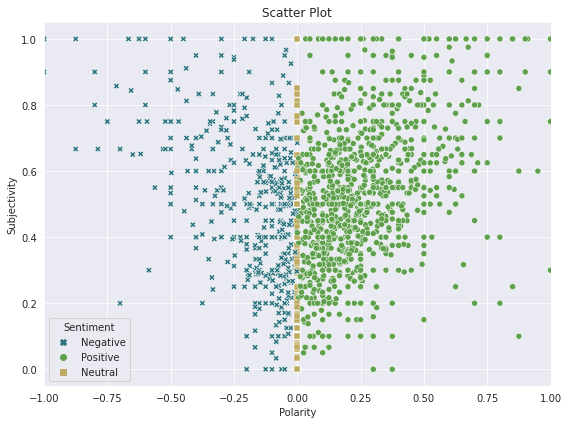

In [ ]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (8,6))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=df, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

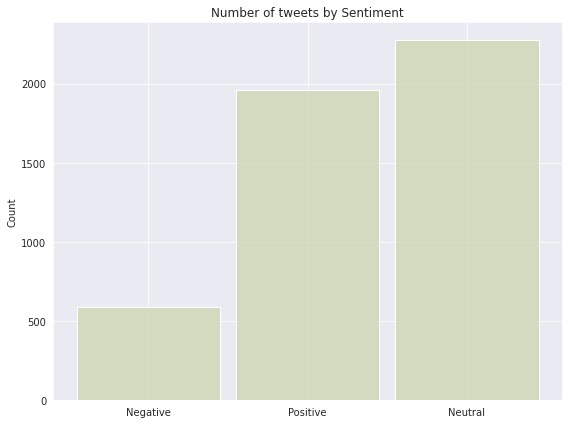

In [ ]:
# Create a bar chart to count tweets according to its sentiment value

plt.figure(figsize = (8,6))

sns.histplot(df, x = 'Sentiment', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment')

plt.tight_layout()

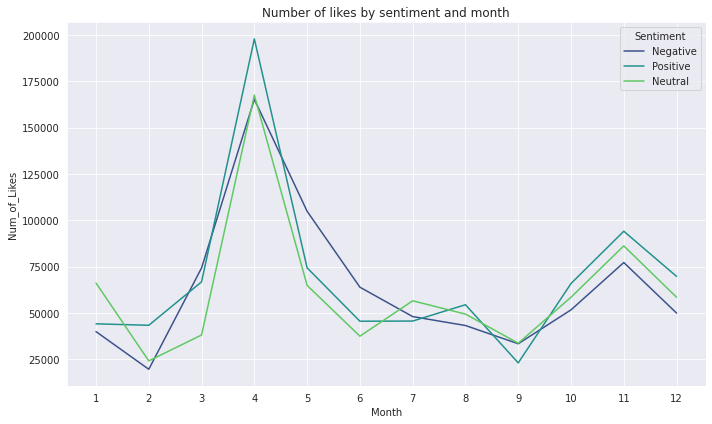

In [ ]:
# Creating month column for time analysis
df['Month'] = pd.DatetimeIndex(df['Datetime']).month

# Creating a plot to show number of likes depending on sentiment through time

plt.figure(figsize = (10, 6))

months = df['Month'].unique()

sns.lineplot(x = 'Month', y = 'Num_of_Likes', hue = 'Sentiment', ci = None, data = df, palette = 'viridis')
plt.title('Number of likes by sentiment and month')
plt.xlabel('Month')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

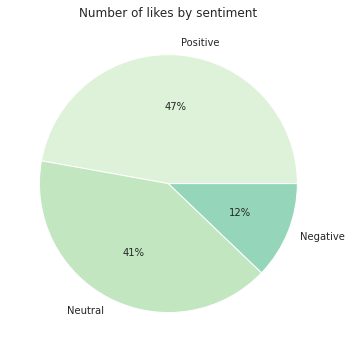

In [ ]:
plt.figure(figsize = (10, 5))

data = df['Sentiment'].value_counts()
colors = sns.color_palette('GnBu')
labels = ['Positive', 'Neutral', 'Negative']

plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Number of likes by sentiment')

plt.tight_layout()

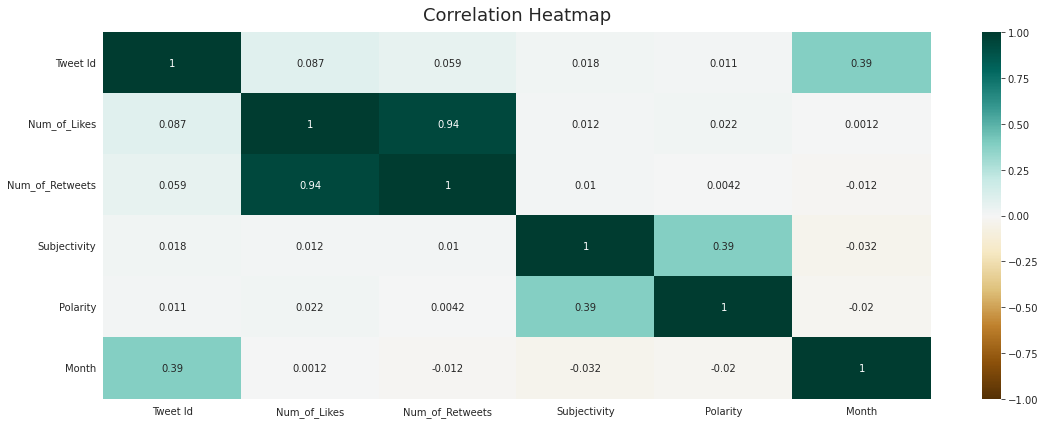

In [ ]:
# Create correlation matrix to see correlation coefficients between sets of variables
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

# **Text Analysis**

In [ ]:
# Create new dataframe 'tx' with Text column
tx = df[['Text']].copy()

In [ ]:
tx.head()

,Text
0,@WholeMarsBlog Macro conditions are difficult:...
1,@SawyerMerritt This capability will save many ...
2,"@RepAdamSchiff @RepMarkTakano False, hate spee..."
3,@SawyerMerritt But the really mind-blowing thi...
4,@SawyerMerritt Important to note that this is ...


In [ ]:
# Reset index
tx.reset_index(drop = True, inplace = True)

Clean and split the text

In [ ]:
# Creating a function to clean the tweets (similar to cleantwt without cleaning the mentions)

def cleantext (text):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
                      "]+", re.UNICODE)

  text = re.sub('https?:\/\/\S+', '', text) # remove the hyperlinks
  text = re.sub('^[\s]+|[\s]+$', '', text) # remove leading and trailing whitespaces
  text = re.sub(emoj, '', text) # remove emojis
  return text

In [ ]:
# Create a new column with the cleaned text

tx['Cleaned_Text'] = tx['Text'].apply(cleantext)

In [ ]:
tx = tx['Cleaned_Text']

# Save all tweets in a list

all_tweets = []

for tweet in tx:
  all_tweets.append(tweet)


# Split tweets in a list of words

lines = list()
for line in all_tweets:
  words = line.split()
  for w in words:
    lines.append(w)

In [ ]:
lines[:20]

['@WholeMarsBlog',
 'Macro',
 'conditions',
 'are',
 'difficult:',
 'energy',
 'in',
 'Europe,',
 'real',
 'estate',
 'in',
 'China',
 '&amp;',
 'crazy',
 'Fed',
 'rates',
 'in',
 'USA',
 '@SawyerMerritt',
 'This']

In [ ]:
# Remove punctuation from the list
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

# Assign all words, except those containing empty string characters, to a new list
lines2 = []

for word in lines:
  if word != '':
    lines2.append(word)

In [ ]:
lines2[:10]

['WholeMarsBlog',
 'Macro',
 'conditions',
 'are',
 'difficult',
 'energy',
 'in',
 'Europe',
 'real',
 'estate']

# Stemming and removing Stop Words
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form.

For example, a stemmer for English operating on the stem cat should identify such strings as cats, catlike, and catty

In [ ]:
# Use SnowballStemmer to stem the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language = 'english') # passing language parameter

stem = []
for word in lines2:
  stem.append(s_stemmer.stem(word))

In [ ]:
stem[:10]

['wholemarsblog',
 'macro',
 'condit',
 'are',
 'difficult',
 'energi',
 'in',
 'europ',
 'real',
 'estat']

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc.Since I have no interest on them, I'm going to delete them.

In [ ]:
# Removing stop words with nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


# Remove all stop words

stem2 = []

for word in stem:
  if word not in stopwords.words():
    stem2.append(word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stem2[:10]

['wholemarsblog',
 'macro',
 'condit',
 'difficult',
 'energi',
 'europ',
 'real',
 'china',
 'amp',
 'crazi']

Create a dataframe from the list of words

In [ ]:
tx2 = pd.DataFrame(stem2)

In [ ]:
tx2.head(10)

,0
0,wholemarsblog
1,macro
2,condit
3,difficult
4,energi
5,europ
6,real
7,china
8,amp
9,crazi


# Creating visualizations

Top 20 words being used in tweets

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Count of words')

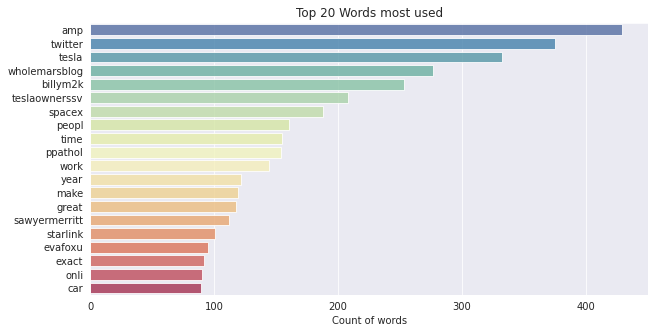

In [ ]:
# Bar plot with top 20 words used

y = tx2[0].value_counts()
y = y[:20]

plt.figure(figsize = (10,5))
sns.barplot(y.values, y.index, palette = 'Spectral_r', alpha = 0.8)
plt.title('Top 20 Words most used')
plt.xlabel('Count of words')

Top persons mentioned in tweets using spacy (NLP)

In [ ]:
# Importing spacy for entity recognition on text data
import spacy
from spacy import displacy

In [ ]:
# Download spacy model
# !python -m spacy download en_core_web_sm

In [ ]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Convert list into a string
string = ' '
text = string.join(lines) # using lines2 instead of stem2 because it contains words unprocessed (more clear to the model)

# Converting text into a doc
doc = nlp(text)

# Creating a loop to store entity and label into lists
words = []
labels = []

for ent in doc.ents:
  words.append(ent.text)
  labels.append(ent.label_)

# Save info into a new dataframe
tx3 = pd.DataFrame({'Words':words,'Labels':labels})

In [ ]:
# Show dataframe
tx3.head(10)

,Words,Labels
0,Macro,ORG
1,Europe,LOC
2,China,GPE
3,Fed,ORG
4,USA,GPE
5,False,PERSON
6,13,CARDINAL
7,Twitter,PRODUCT
8,CommunityNotes,ORG
9,Earth,LOC


The model has categorized the entities quite well. It is important to remember that no model is perfect so it is possible that some errors may appear.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


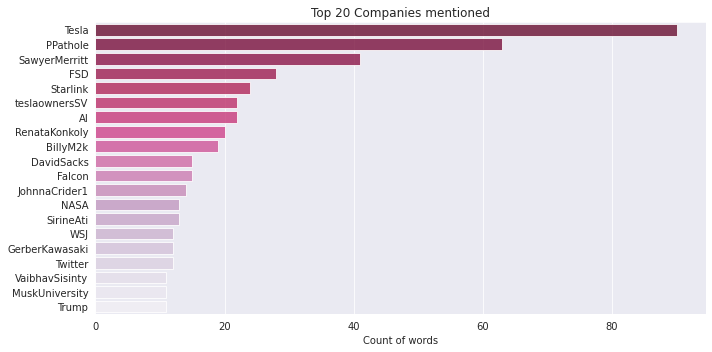

In [ ]:
# Plotting companies most mentioned in tweets

y = tx3[tx3['Labels'] == 'ORG']['Words'].value_counts()
y = y[:20]

plt.figure(figsize = (10,5))
sns.barplot(y.values, y.index, palette = 'PuRd_r', alpha = 0.8)
plt.title('Top 20 Companies mentioned')
plt.xlabel('Count of words')

plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


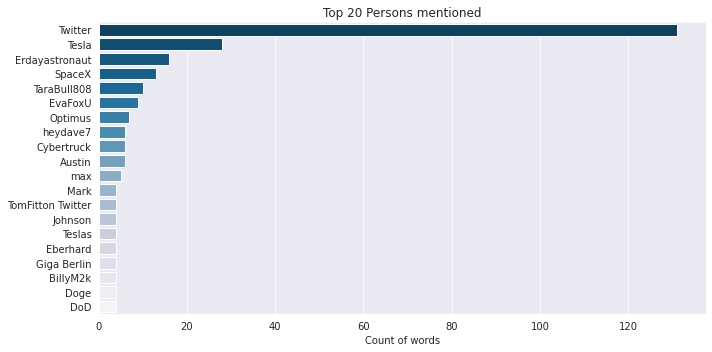

In [ ]:
# Plotting persons most mentioned in tweets

y = tx3[tx3['Labels'] == 'PERSON']['Words'].value_counts()
y = y[:20]

plt.figure(figsize = (10,5))
sns.barplot(y.values, y.index, palette = 'PuBu_r')
plt.title('Top 20 Persons mentioned')
plt.xlabel('Count of words')

plt.tight_layout()

Word Cloud

In [ ]:
from wordcloud import WordCloud

def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

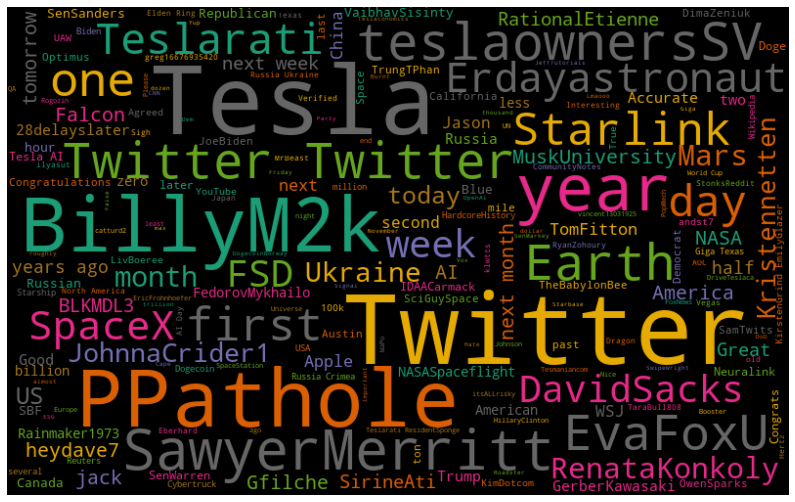

In [ ]:
all_words = ' '.join(word for word in words)
generate_wordcloud(all_words)